# <center>Relative Word Order Study</center>

The ten corpus I choose are:
- UD_Afrikaans-AfriBooms,
- UD_Basque-BDT,
- UD_Catalan-AnCora,
- UD_Danish-DDT,
- UD_English-ESL,
- UD_Faroese-FarPaHC,
- UD_Galician-CTG,
- UD_Hebrew-HTB,
- UD_Icelandic-IcePaHC, and
- UD_Japanese-BCCWJ.

In [99]:
import sys
import conllu
import matplotlib.pyplot as plt

In [94]:
def counter(corpus_dir):
    """
    Counts vo and ov ratio.
    (ov + vo) does not have to be 1, since there are cases miss at least one of them.
    `iobj` and `obj` in the deprel field are the object.
    `VERB` in the upos field is the verb.
    The result is rounded to 2 decimals.
    """
    corpus = conllu.parse(open(corpus_dir, "r").read())
    deprel = []
    pos = []
    for sentence in corpus:
        deprel.append([token['deprel'] for token in sentence])
        pos.append([token['upos'] for token in sentence])

    # obj and iobj are treated equally as obj
    for l in deprel:
        for e in l:
            if e == 'iobj':
                e ='obj'

    obj_order = []
    for l in deprel:
        try:
            obj_order.append(l.index('obj'))
        except:
            obj_order.append(-1)

    verb_order = []
    for l in pos:
        try:
            verb_order.append(l.index('VERB'))
        except:
            verb_order.append(-1)

    vo = 0
    ov = 0
    null = 0
    for i in range(0, len(verb_order)):
        if obj_order[i] > 0 and verb_order[i] > 0:
            if obj_order[i] > verb_order[i]:
                ov +=1
            else:
                vo +=1
        else:
            null+=1
    return round(vo/len(verb_order), 2), round(ov/len(verb_order), 2)

In [97]:
vo_af, ov_af = counter('./corpus/af_afribooms-ud-train.conllu')
vo_ca, ov_ca = counter('./corpus/ca_ancora-ud-train.conllu')
vo_da, ov_da = counter('./corpus/da_ddt-ud-train.conllu')
vo_en, ov_en = counter('./corpus/en_esl-ud-train.conllu')
vo_eu, ov_eu = counter('./corpus/eu_bdt-ud-train.conllu')
vo_fo, ov_fo = counter('./corpus/fo_farpahc-ud-train.conllu')
vo_gl, ov_gl = counter('./corpus/gl_ctg-ud-train.conllu')
vo_he, ov_he = counter('./corpus/he_htb-ud-train.conllu')
vo_is, ov_is = counter('./corpus/is_icepahc-ud-train.conllu')
vo_ja, ov_ja = counter('./corpus/ja_bccwj-ud-train.conllu')

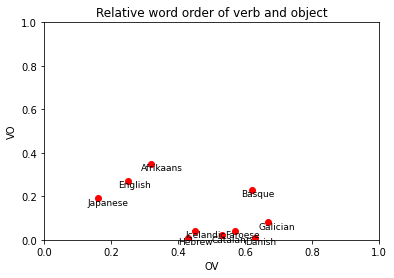

In [100]:
labels = {0:'Afrikaans', 1:'Basque', 2:'Catalan',3:'Danish',4:'English', 5:'Faroese', 6:'Galician', 7:'Hebrew',
         8:'Icelandic', 9:'Japanese'}
x = [ov_af, ov_ca, ov_da, ov_en, ov_eu, ov_fo, ov_gl, ov_he, ov_is, ov_ja]  # proportion of OV
y = [vo_af, vo_ca, vo_da, vo_en, vo_eu, vo_fo, vo_gl, vo_he, vo_is, vo_ja ]  # proportion of VO
plt.plot(x, y, 'ro')
plt.title('Relative word order of verb and object')
plt.xlim([0,1]) # Set the x and y axis ranges
plt.ylim([0,1])
plt.xlabel('OV') # Set the x and y axis labels
plt.ylabel('VO')
for i in labels:  # Add labels to each of the points
    plt.text(x[i]-0.03, y[i]-0.03, labels[i], fontsize=9)
plt.savefig(sys.argv[1])
plt.show()